In [10]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from stop_words import get_stop_words
from collections import Counter
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np

from PIL import Image


In [124]:
stop_words = get_stop_words('es')
extras = ["padre", "padres", "padre!", "rt", "día", "dia", "papá", "padre.", "ausente", "padre?", "q"]
stop_words.extend(extras)

In [125]:
df = pd.read_csv("../../../data/padre_mentions.txt", names=["words"])

In [126]:
df.head()

,words
0,Gracias por hacerme el padre más feliz FELIZ D...
1,Happy Father's Day aka Feliz Dia del Padre. In...
2,RT Feliz día del padre a los que lo son
3,RT Un padre se preocupa
4,RT Felicitaciones a quienes con amor


In [127]:
df["words"] = df["words"].str.lower().str.replace("!","").str.replace("¡","")

In [128]:
words = df["words"].str.cat(sep=' ').lower().split(" ")
word_count = Counter(words)

In [129]:
wc_aux = word_count.copy()
for w in wc_aux:
    if w in stop_words:
        del word_count[w]

In [130]:
def white_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "rgb(255, 255, 255)" 

In [131]:
bigote = np.array(Image.open("../../../data/bt.png"))

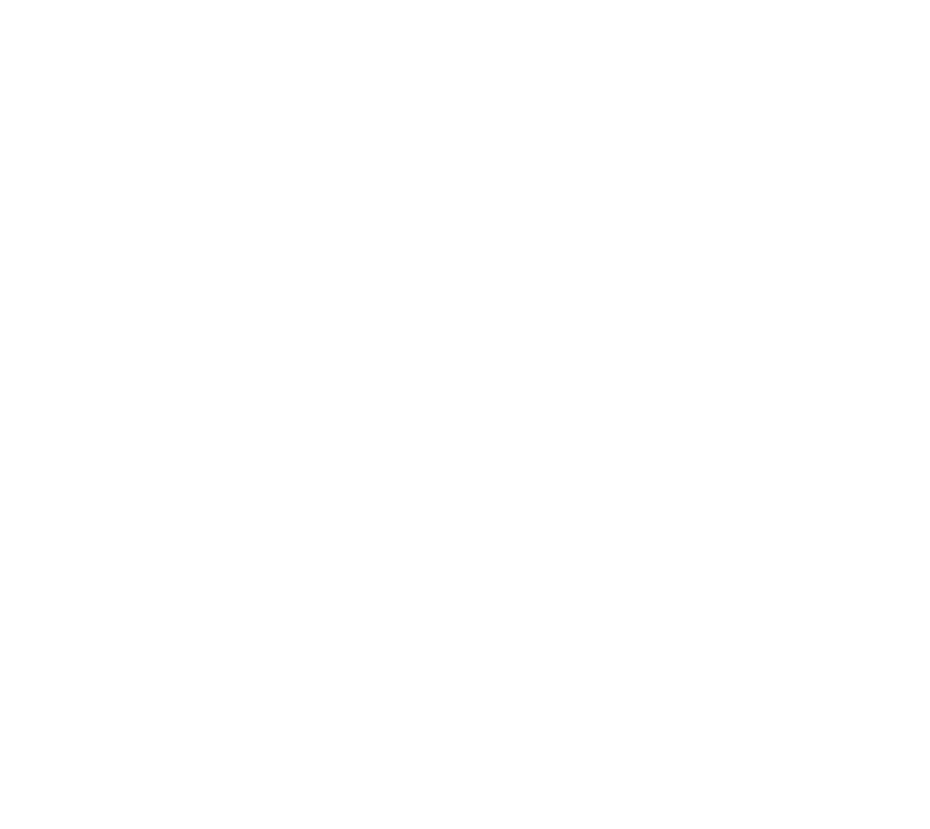

In [132]:
wc = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
               width=1000, 
               height=1500,
               mask=bigote,
               font_path = '../../../styles/Florsn01.ttf').generate_from_frequencies(word_count)
wc.recolor(color_func=white_color_func, random_state=336)

fig = plt.figure(figsize=(20,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig(f'padre.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()